<a href="https://colab.research.google.com/github/Mansi-3s/Creditt_wise_loan/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [5]:
import seaborn as sns

df = sns.load_dataset("iris")


In [6]:
titanic = sns.load_dataset("titanic")

features = ["pclass", "sex", "fare", "embarked", "age"]
target = ["survived"]

# handle missing data
imp_median = SimpleImputer(strategy="median")
titanic[["age"]] = imp_median.fit_transform(titanic[["age"]])

imp_freq = SimpleImputer(strategy="most_frequent")
titanic[["embarked"]] = imp_freq.fit_transform(titanic[["embarked"]])

# encode
le = LabelEncoder()

titanic["sex"] = le.fit_transform(titanic["sex"])
titanic["embarked"] = le.fit_transform(titanic["embarked"])

X = titanic[features]
y = titanic["survived"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=42
)

In [7]:
# Decision Tree
model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("Training accuracy: ", accuracy_score(y_train, y_pred_train)*100, "%")
print("Testing accuracy: ", accuracy_score(y_test, y_pred_test)*100, "%")
# classic case of overfitting

Training accuracy:  84.75120385232745 %
Testing accuracy:  82.46268656716418 %


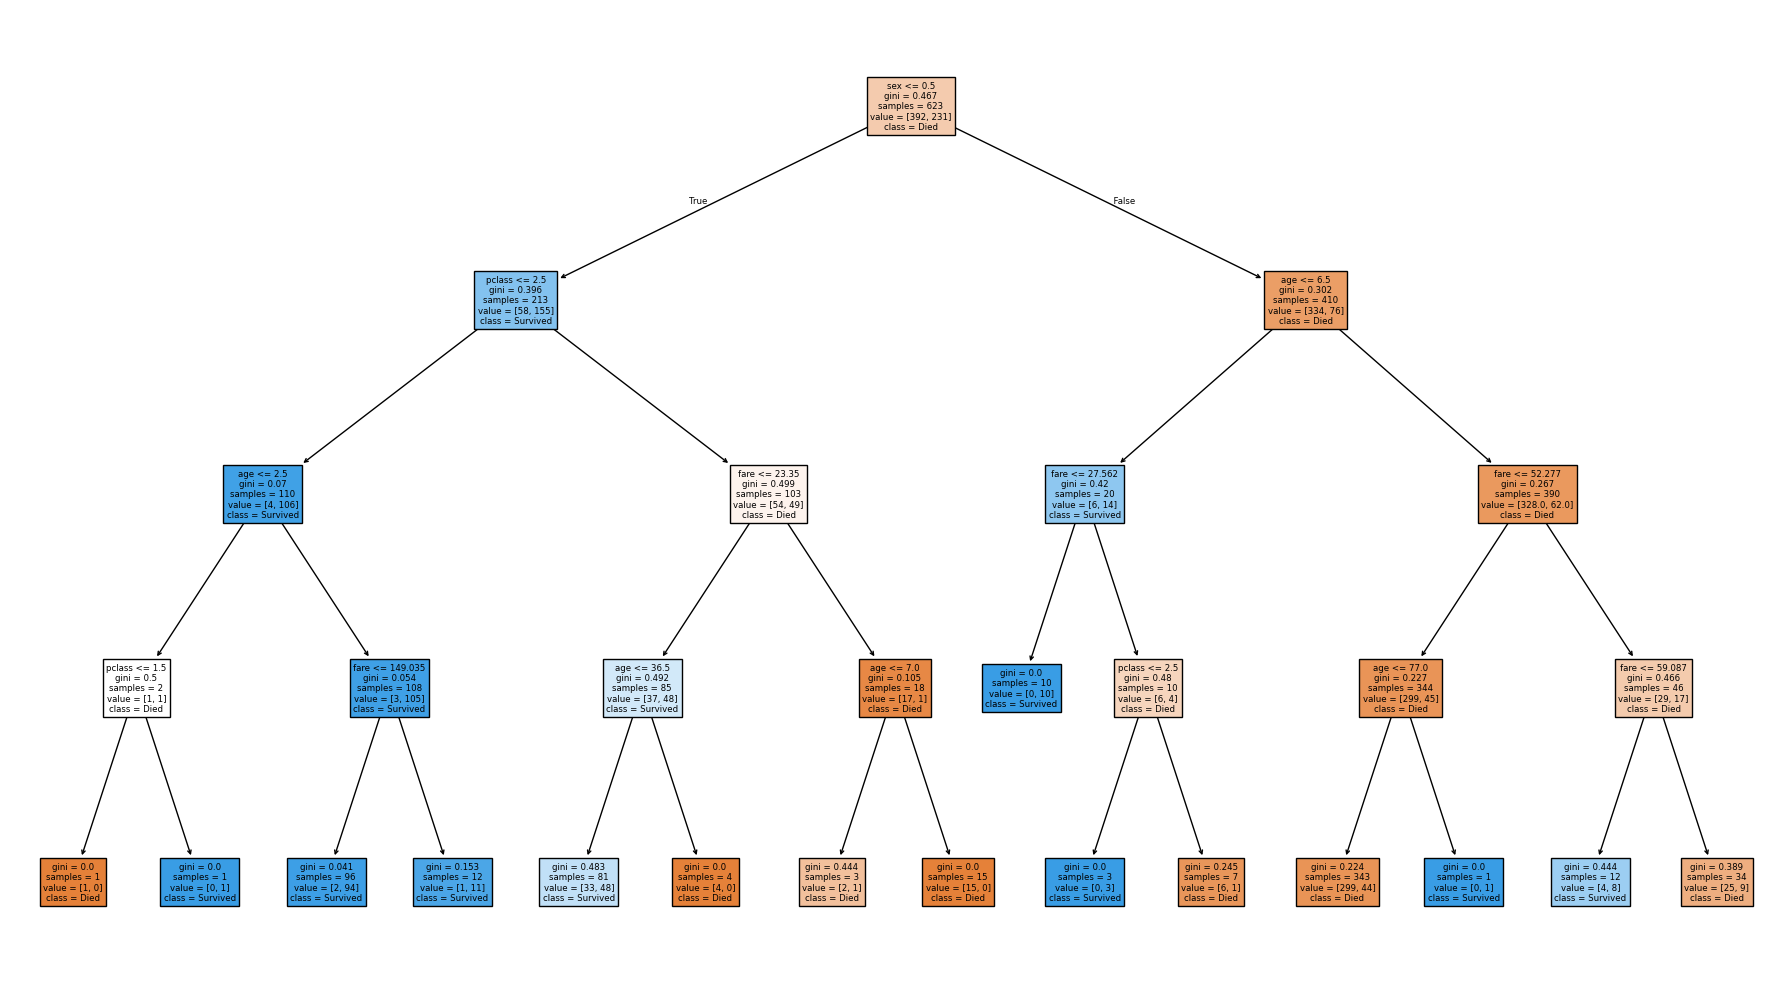

In [8]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True
)

plt.tight_layout()

In [9]:
# apply random forest
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=501,
    oob_score=True,
    max_depth=4
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("OOB score: ", rf.oob_score_ * 100, "%")
print("testing accuracy: ", accuracy_score(y_test, y_pred) * 100, "%")


OOB score:  82.8250401284109 %
testing accuracy:  81.34328358208955 %


In [10]:
# Bagging Classifier(yes/no)

from sklearn.ensemble import BaggingClassifier

base_model = DecisionTreeClassifier()

bagging = BaggingClassifier(
    base_model,
    n_estimators=201
)

bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)

print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.7649253731343284


In [11]:
# Bagging Classifier

from sklearn.linear_model import LogisticRegression

base_model = LogisticRegression(max_iter=1000)

bagging = BaggingClassifier(
    base_model,
    n_estimators=201
)

bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)

print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.7947761194029851


In [14]:
#regressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

# Base model: SVR
base_model = SVR(
    kernel="rbf",
    C=1.0,
    epsilon=0.1
)

bagging = BaggingRegressor(
    estimator=base_model,
    n_estimators=201,
    random_state=42,
    n_jobs=-1
)

bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)

print("R2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 score: -0.0046690848749060265
MSE: 0.2437676562446395
